In [1]:
import networkx as nx
import numpy as np
import snap

W zadaniach oprócz ze źródeł podanych przez Pana, korzystałam również z serii nagrań krótkich wykładów - https://www.youtube.com/watch?v=VpiyOxiVmCg.

# Zad 1

In [54]:
def gen_graph(n, p = 0.1):
    largest = set()
    while len(largest) < n:
        G = nx.gnp_random_graph(n, p, directed = True)
        largest = max(nx.strongly_connected_components(G), key = len)
    return G

In [55]:
def adj_matrix(G):
    n = len(G)
    M = np.zeros((n,n))
    for v in G.nodes:
        con_vertices = G[v]
        num = len(con_vertices)
        for u in con_vertices:
            M[v, u] = 1 / num
    return M

Zgodnie z pracą podaną jako źródło, możemy potraktować r jako wektor własny dominującej własności własnej (d) macierzy M.

In [56]:
def power_method(A, max_iter, epsilon):
    x = np.random.rand(A.shape[0], 1)
    n = A.shape[0]
    i = 0
    x1 = A @ x
    max_elemt = 1
    while i < max_iter and np.linalg.norm(x*max_elemt - x1) > epsilon: 
        max_elemt = np.linalg.norm(x1, ord = np.inf)
        x = x1/max_elemt
        i+=1
        x1 = A @ x
    return max_elemt, x1/np.linalg.norm(x1)

In [57]:
def rank(n, p = 0.1):
    G = gen_graph(n, p)
    page_nx = nx.pagerank(G)
    nx.draw(G, with_labels = True)
    M = adj_matrix(G)
    val, vec = power_method(M.T, 1000, 1e-10)
    return page_nx, vec

def print_max_rank(page_nx, page_pm):
    print("Wierzchołek z największym rankingiem: ")
    max_1 = max(page_nx, key = page_nx.get)
    print(max_1)
    print("Mój wynik: ")
    max_2 = np.argmax(page_pm)
    print(max_2)
    print("Wierzchołek z najmniejszym rankingiem: ")
    min_1 = min(page_nx, key = page_nx.get)
    print(min_1)
    print("Mój wynik: ")
    min_2 = np.argmin(page_pm)
    print(min_2)
    return max_1, max_2, min_1, min_2

Wyniki powinne być zgodne z zasadą - strona (wierzchołek) ma wysoki ranking, kiedy suma rankingow stron z odwołaniami do niej (backlinks) jest duża.

Wierzchołek z największym rankingiem: 
10
Mój wynik: 
10
Wierzchołek z najmniejszym rankingiem: 
8
Mój wynik: 
8


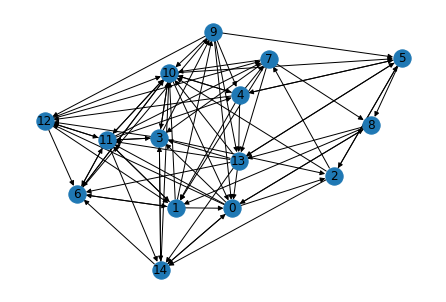

In [58]:
page_nx, page_pm = rank (15, 0.4)
max_1, max_2, min_1, min_2 = print_max_rank(page_nx, page_pm)

Wierzchołek z największym rankingiem: 
8
Mój wynik: 
8
Wierzchołek z najmniejszym rankingiem: 
2
Mój wynik: 
2


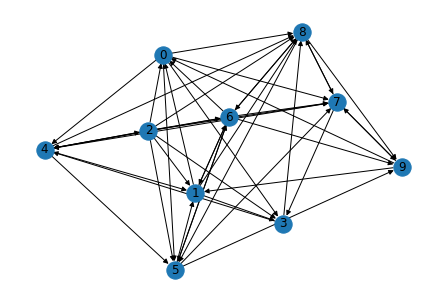

In [59]:
page_nx, page_pm = rank(10, 0.4) 
max_1, max_2, min_1, min_2 = print_max_rank(page_nx, page_pm)

Wierzchołek z największym rankingiem: 
9
Mój wynik: 
9
Wierzchołek z najmniejszym rankingiem: 
10
Mój wynik: 
10


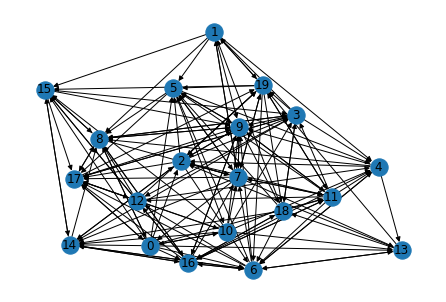

In [60]:
page_nx, page_pm = rank(20, 0.4)
max_1, max_2, min_1, min_2 = print_max_rank(page_nx, page_pm)

Postanowiłam wypisać wierzchołki o największym i najmniejszym rankingu. Powyższe grafy są na tyle niewielkie, że można przeanalizować, czym charakteryzują się wypisane wierzchołki. Najczęściej wierzchołki o niskim rankingu mają niewiele krawędzi "wchodzących" do nich w przeciwieństwie do wierzchołków o wysokim rankingu. Oczywiście liczy się także, jaki ranking mają sąsiedzi, którzy łączą się poprzez te krawędzie. 

Wyniki funkcji bibliotecznej, co prawda bardzo rzadko, ale czasami nie zgadzają sie z wynikami metody potęgowej. Myślę, że wynika to ze struktury grafu. Zgodnie z pracą podaną w źródłach, problematyczne są wierzchołki, które mają połączenia tylko między sobą. Przykładowo, kiedy zasotuję tą metodę na grafie, który jest cyklem rozwiązanie nie będzie poprawne. Rozwiązaniem tego problemu jest wprowadzenie wektora e, który prowadza pewną losowość, gdzie "wylądujemy" w następnym kroku. 



# Zad 2

In [61]:
from numpy.linalg import norm

def pm_page_rank(A, d, epsilon, e = []):
    n = A.shape[0]
    if  len(e)==0:
        e = np.ones(n)/n
        
    x = np.ones(n)/n
    
    B = d*A + (1-d)* e @ np.ones([n, n])
#     print(B)
#     print((1-d)* e @ np.ones([n, n]))
    x1 = B @ x
    d = norm(x, ord = 1) - norm(x1, ord = 1)
    x1 = x1 + d * e
    delta = norm(x1-x, ord = 1)
    x = x1 
    while delta > epsilon:
        x1 = B @ x
        d = norm(x, ord = 1) - norm(x1, ord = 1)
        x1 = x1 + d * e
        delta = norm(x1-x, ord = 1)
        x = x1       
     
    return x1

In [62]:
def matrix_snap(G):
    n = G.GetNodes()
    M = np.zeros((n, n))
    for NI in G2.Nodes():
        node = NI.GetId()
        degree = NI.GetOutDeg()
        for i in range(degree):
            neighbour = NI.GetOutNId(i)
            M[node, neighbour] = 1/degree
    return M

In [52]:
def test_page_rank(G, e = []):
    d = [0.9,0.85, 0.75, 0.6, 0.5]
    M = matrix_snap(G)
    page_rank = G.GetPageRank()
#     print("Funkcja biblioteczna: ")
#     for g in page_rank:
#         print(page_rank[g])
    print("Wierzchołek z największym rankingiem: ")
    max_1 = max(page_rank, key = page_rank.get)
    print(max_1)
    print("Wierzchołek z najmniejszym rankingiem: ")
    min_1 = min(page_rank, key = page_rank.get)
    print(min_1)
    print(" ")
    for el in d:
        print(f'd = {el}')
        page_pm = pm_page_rank(M.T, el, 1e-4, e)
        print("Największy: ")
        print(np.argmax(page_pm))
        print("Najmniejszy: ")
        print(np.argmin(page_pm))
        print("Różne wyniki: ")
        count = 0
        for i in range(len(page_pm)):
            if not np.isclose(page_pm[i] - page_rank[i], 0, atol = 1e-4):
                count+=1
        print(count)
        print(" ")
        
    return max_1, min_1

Pierwszy test funkcji przeprowadziłam na grafie o 2000 wierzchołkach dla różnych wartości d.

In [51]:
G2 = snap.GenRndGnm(snap.TNGraph, 2000, 2700)
max_r, min_r = test_page_rank(G2)

Wierzchołek z największym rankingiem: 
1114
Wierzchołek z najmniejszym rankingiem: 
3
 
d = 0.9
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
84
 
d = 0.85
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
0
 
d = 0.75
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
153
 
d = 0.6
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
376
 
d = 0.5
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
1255
 


Wyniki bardzo często zgadzają sie z funkcją biblioteczną. Zauważyłam rówież, że największa zgodność występuje przy d wynoszącym 0.85 a przy 0.9 też mało wyników się różni. Przy 0.5 wyniki znacząco odstają od siebie. Zależy to też od dokładności z jaką wywołuje funkcję page_rank_pm i isclose (np przy 1e-3 bardzo mało wyników różniło się). Jednak ogólna tendencja zgadza się z informacją, którą uzyskałam ze wspomnianych wcześniej źródeł - najlepiej wybrać parametr d z zakresu 0.9 - 0.8. 

In [53]:
G = snap.LoadEdgeListStr(snap.TNGraph, "C:\\Users\\joann\\Downloads\\p2p-Gnutella04.txt" , 0, 1)
print("Number of Nodes: %d" % G.GetNodes())
print(G.GetNodes())
max_1, min_1 = test_page_rank(G)

Number of Nodes: 10876
10876
Wierzchołek z największym rankingiem: 
1170
Wierzchołek z najmniejszym rankingiem: 
7651
 
d = 0.9
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
1115
 
d = 0.85
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
1053
 
d = 0.75
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
923
 
d = 0.6
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
713
 
d = 0.5
Największy: 
1114
Najmniejszy: 
3
Różne wyniki: 
567
 


Jeśli chodzi o grafy o większej liczbie wierzchołków, postanowiłam spróbować przetestować moją funkcję na grafie o 10876 wierzchołków. Wartości w rankingu są bardzo małe, nie umiałam odpowiednio dobrać parametrów funkcji, aby wyniki były sensowne.

Przeprowadzenie tych operacji na grafach o dużych rozmiarach potrzebuje odpowiednich zasobów pamięci, w przeciwnym przypadku dane należy dzielić i ustalać ranking w paru krokach. Zgodnie z przytoczonym artykułem operacje te zajmują również dużo czasu ze względu na ogrom danych.